# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Prototipo de modelo de machine learning para Zyfra

# 1. Preparación de los datos

# 1.1. Apertura de los archivos y examinación de los datos

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.impute import SimpleImputer

# Definir rutas de acceso a los archivos
train_path = '/datasets/gold_recovery_train.csv'
test_path = '/datasets/gold_recovery_test.csv'
full_path = '/datasets/gold_recovery_full.csv'

# Cargar los datos en DataFrames
train = pd.read_csv(train_path, index_col='date', parse_dates=['date'])
test = pd.read_csv(test_path, index_col='date', parse_dates=['date'])
full = pd.read_csv(full_path, index_col='date', parse_dates=['date'])

# Examinar las primeras filas de cada conjunto
print("Datos de entrenamiento:")
print(train.head(), '\n')
print("Datos de prueba:")
print(test.head(), '\n')
print("Datos completos:")
print(full.head(), '\n')

# Información general de los DataFrames
print("Información del conjunto de entrenamiento:")
print(train.info(), '\n')
print("Información del conjunto de prueba:")
print(test.info(), '\n')
print("Información del conjunto completo:")
print(full.info(), '\n')

Datos de entrenamiento:
                     final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.co

# 1.2. Comprobación del cálculo correcto de la recuperación

Fórmula de comprobación:
Recovery= (F*(C−T)/C*(F−T))*100


Donde:

C = rougher.output.concentrate_au (concentración de oro en el concentrado rougher)

F = rougher.input.feed_au (concentración de oro en la materia prima)

T = rougher.output.tail_au (concentración de oro en los residuos)

In [2]:
# Seleccionar las columnas necesarias para el cálculo
required_columns = [
    'rougher.output.concentrate_au', 
    'rougher.input.feed_au', 
    'rougher.output.tail_au', 
    'rougher.output.recovery'
]

# Eliminar filas con valores nulos en las columnas requeridas
train_clean = train[required_columns].dropna()

# Aplicar la fórmula de recuperación
C = train_clean['rougher.output.concentrate_au']
F = train_clean['rougher.input.feed_au']
T = train_clean['rougher.output.tail_au']

train_clean['calculated_recovery'] = (C * (F - T)) / (F * (C - T)) * 100

# Calcular el Error Absoluto Medio (EAM)
mae = mean_absolute_error(train_clean['rougher.output.recovery'], train_clean['calculated_recovery'])

# Mostrar resultados
print(f'Error Absoluto Medio (EAM): {mae:.4f}')

Error Absoluto Medio (EAM): 0.0000


Se filtraron las columnas necesarias para el cálculo de la recuperación.
Se eliminaron filas con valores nulos para evitar errores en los cálculos.
Se aplicó la fórmula de recuperación utilizando operaciones de Pandas.
Se calculó el EAM entre los valores calculados y los proporcionados.

El resultado de un Error Absoluto Medio (EAM) igual a 0.0000 indica que no hay discrepancia entre los valores calculados de la recuperación (calculated_recovery) y los valores proporcionados en la columna rougher.output.recovery.

Esto sugiere que:

Los cálculos de recuperación son correctos y están en línea con los valores proporcionados.
Los datos no presentan errores en la fórmula aplicada para esta característica.

# 1.3. Análisis de las características no disponibles en el conjunto de prueba

Se obtiene el conjunto de columnas de train y test.

Se identifican las columnas que están en train pero no en test.

Se muestran las columnas faltantes y sus tipos de datos.

In [3]:
# Obtener las columnas de cada conjunto de datos
train_columns = set(train.columns)
test_columns = set(test.columns)

# Identificar las columnas que están en el entrenamiento pero no en la prueba
missing_columns = train_columns - test_columns

# Mostrar las columnas faltantes
print("Características no disponibles en el conjunto de prueba:")
print(missing_columns)

# Obtener el tipo de las columnas faltantes en el conjunto de entrenamiento
missing_types = train[missing_columns].dtypes

print("\nTipos de las características no disponibles en el conjunto de prueba:")
print(missing_types)

Características no disponibles en el conjunto de prueba:
{'final.output.concentrate_au', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_sol', 'final.output.recovery', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_sol', 'rougher.output.recovery', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_pb', 'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag', 'final.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'primary_cleaner.output.

Se identificaron 35 características que están presentes en el conjunto de entrenamiento pero no en el de prueba.

Estas características corresponden principalmente a parámetros de salida (output) y cálculo (calculation), lo que indica que probablemente fueron medidas o calculadas después del proceso de producción.

Los datos de prueba solo contienen variables de entrada (input) y de estado (state), las cuales son conocidas antes de la producción.

Todas las columnas ausentes son de tipo float64, lo que sugiere que contienen valores numéricos continuos.

Esto es consistente con las mediciones de concentraciones y proporciones en el proceso de flotación y purificación.

# 1.4. Preprocesamiento de datos

In [4]:
# Manejo de valores nulos (ver proporción de nulos)
print("Valores nulos en entrenamiento:")
print(train.isnull().sum().sort_values(ascending=False).head(10))

print("\nValores nulos en prueba:")
print(test.isnull().sum().sort_values(ascending=False).head(10))

# Eliminar filas con valores nulos críticos (como en variables objetivo)
train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

# Eliminación de duplicados
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

# Verificar los cambios realizados
print("\nDatos de entrenamiento después del preprocesamiento:")
print(train.info())

print("\nDatos de prueba después del preprocesamiento:")
print(test.info())

Valores nulos en entrenamiento:
rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64

Valores nulos en prueba:
rougher.input.floatbank11_xanthate          353
primary_cleaner.input.sulfate               302
primary_cleaner.input.depressant            284
rougher.input.floatbank10_sulfate           257
primary_cleaner.input.xanthate              166
rougher.input.floatbank10_xanthate          123
rougher.input.feed_sol                       67
rougher.input.floatbank11_sulfate            55
rougher.input.feed_rate                      40
secondary_cleaner.state.floatbank3_a_air     34
dtype: int64

Datos

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - El código muestra un buen inicio en el preprocesamiento de datos, pero hay aspectos importantes a mejorar:

1. Es recomendable agregar visualizaciones de los valores nulos (como un heatmap) para tener una mejor comprensión de su distribución.

2. Al eliminar filas con valores nulos en 'rougher.output.recovery' y 'final.output.recovery', deberías reportar cuántas filas se pierden para evaluar el impacto en el conjunto de datos.

3. Falta un análisis de valores atípicos (outliers) que podrían afectar el modelo.

4. Considera agregar un análisis de la distribución de las variables objetivo antes y después del preprocesamiento.

El código funciona, pero estas mejoras ayudarían a tener un análisis más robusto y completo.

</div>

# 2. Análisis de los datos

# 2.1. Observación de la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación

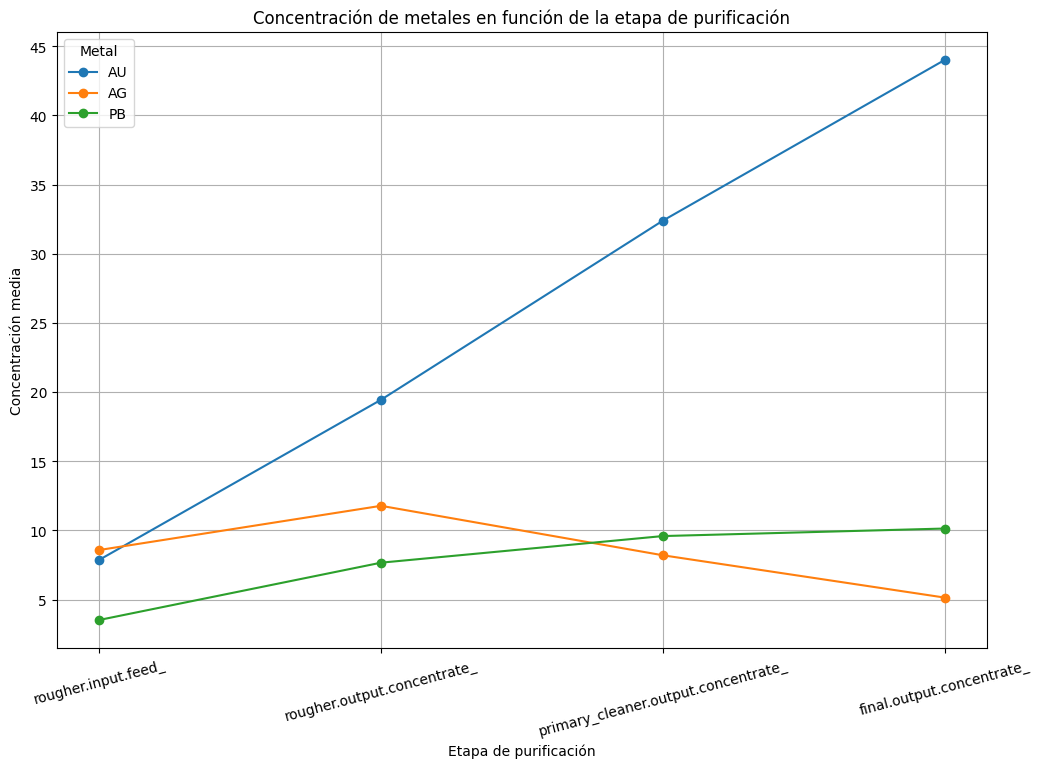

In [5]:
# Selección de columnas relevantes
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed_', 'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_', 'final.output.concentrate_']

# Graficar la concentración de metales en las diferentes etapas
plt.figure(figsize=(12, 8))

for metal in metals:
    concentrations = [train[f"{stage}{metal}"].mean() for stage in stages]
    plt.plot(stages, concentrations, marker='o', label=metal.upper())

plt.title('Concentración de metales en función de la etapa de purificación')
plt.xlabel('Etapa de purificación')
plt.ylabel('Concentración media')
plt.legend(title='Metal')
plt.grid(True)
plt.xticks(rotation=15)
plt.show()

# 2.2. Comparación de las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba

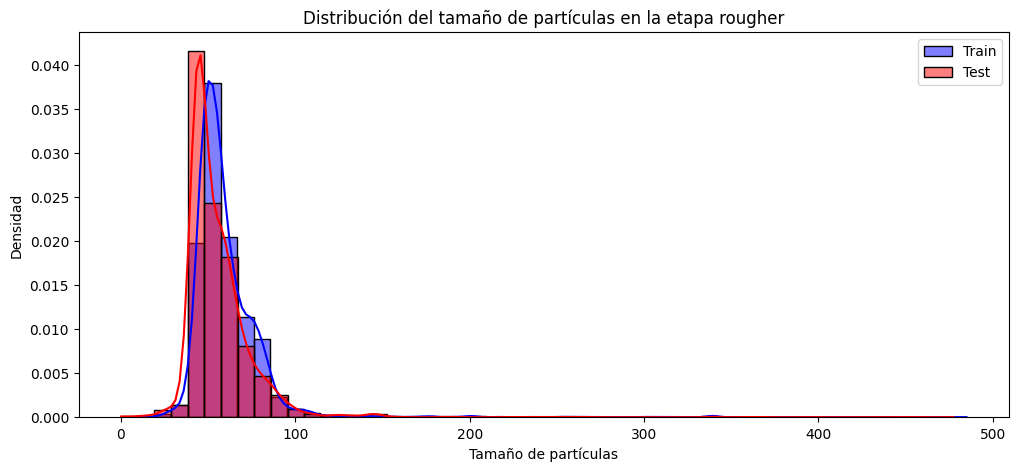

Estadísticas de 'rougher.input.feed_size':

Train:
count    14005.000000
mean        60.110518
std         22.418485
min          9.659576
25%         48.973027
50%         55.373885
75%         66.080172
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Test:
count    5834.000000
mean       55.937535
std        22.724254
min         0.046369
25%        43.890852
50%        50.002004
75%        61.638434
max       477.445473
Name: rougher.input.feed_size, dtype: float64


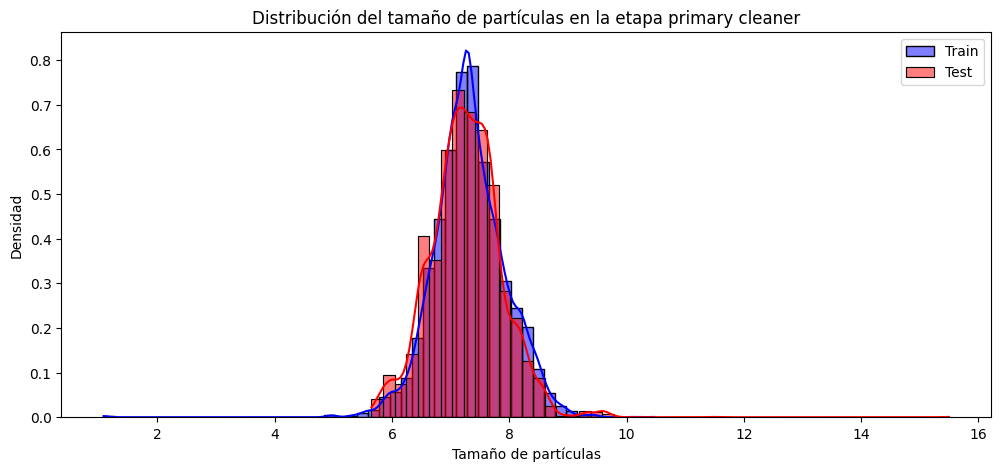


Estadísticas de 'primary_cleaner.input.feed_size':

Train:
count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

Test:
count    5850.000000
mean        7.264454
std         0.611806
min         5.650000
25%         6.880000
50%         7.251667
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64


In [6]:
# Comparar la distribución de 'rougher.input.feed_size'
plt.figure(figsize=(12, 5))
sns.histplot(train['rougher.input.feed_size'], color='blue', label='Train', kde=True, stat='density', bins=50)
sns.histplot(test['rougher.input.feed_size'], color='red', label='Test', kde=True, stat='density', bins=50)
plt.title('Distribución del tamaño de partículas en la etapa rougher')
plt.xlabel('Tamaño de partículas')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Mostrar estadísticas descriptivas para 'rougher.input.feed_size'
print("Estadísticas de 'rougher.input.feed_size':")
print("\nTrain:")
print(train['rougher.input.feed_size'].describe())
print("\nTest:")
print(test['rougher.input.feed_size'].describe())

# Comparar la distribución de 'primary_cleaner.input.feed_size'
plt.figure(figsize=(12, 5))
sns.histplot(train['primary_cleaner.input.feed_size'], color='blue', label='Train', kde=True, stat='density', bins=50)
sns.histplot(test['primary_cleaner.input.feed_size'], color='red', label='Test', kde=True, stat='density', bins=50)
plt.title('Distribución del tamaño de partículas en la etapa primary cleaner')
plt.xlabel('Tamaño de partículas')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Mostrar estadísticas descriptivas para 'primary_cleaner.input.feed_size'
print("\nEstadísticas de 'primary_cleaner.input.feed_size':")
print("\nTrain:")
print(train['primary_cleaner.input.feed_size'].describe())
print("\nTest:")
print(test['primary_cleaner.input.feed_size'].describe())

Las distribuciones varían de manera significativa.

# 2.3. Concentraciones totales de todas las sustancias en las diferentes etapas

Estadísticas de las concentraciones totales por etapa:

         feed_total  rougher_total   final_total
count  14149.000000   14149.000000  14149.000000
mean      56.056063      67.139033     68.343315
std        7.561314      12.773579      7.071971
min        0.040000       0.000000      0.000000
25%       52.537874      64.901790     67.557610
50%       56.603740      69.174314     69.141329
75%       60.762141      73.428728     70.974661
max       74.458253      88.140119     80.210644


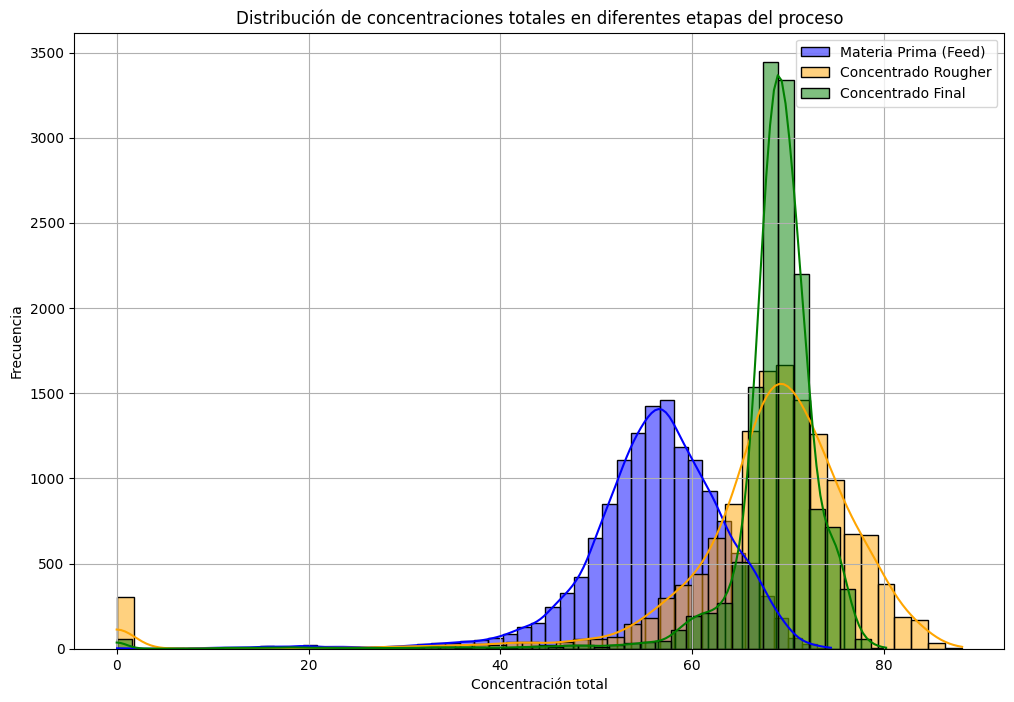

In [7]:
# Definir las columnas relevantes para cada etapa
feed_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au', 'rougher.input.feed_sol']
rougher_columns = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol']
final_columns = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_sol']

# Calcular la concentración total de todas las sustancias en cada etapa
train['feed_total'] = train[feed_columns].sum(axis=1)
train['rougher_total'] = train[rougher_columns].sum(axis=1)
train['final_total'] = train[final_columns].sum(axis=1)

# Mostrar estadísticas numéricas de las concentraciones totales
concentration_stats = train[['feed_total', 'rougher_total', 'final_total']].describe()
print("Estadísticas de las concentraciones totales por etapa:\n")
print(concentration_stats)

# Comparar las distribuciones de las concentraciones totales en cada etapa
plt.figure(figsize=(12, 8))

sns.histplot(train['feed_total'], label='Materia Prima (Feed)', kde=True, color='blue', bins=50)
sns.histplot(train['rougher_total'], label='Concentrado Rougher', kde=True, color='orange', bins=50)
sns.histplot(train['final_total'], label='Concentrado Final', kde=True, color='green', bins=50)

plt.title('Distribución de concentraciones totales en diferentes etapas del proceso')
plt.xlabel('Concentración total')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

En la distribución total de las concentraciones, se pueden observar los siguientes valores anómalos:

Valores mínimos en rougher y final total:

La presencia de valores mínimos de 0.000000 en rougher_total y final_total es anómala, ya que indica que no hay ninguna sustancia en la muestra, lo cual no es realista en un proceso de producción.
Esto sugiere un posible error en la recolección de datos o valores perdidos representados como ceros.

Valores máximos:

No se observan valores extremadamente altos que sobresalgan de forma inusual en las concentraciones, por lo que parecen estar dentro de un rango esperado.

Decisión sobre la eliminación de anomalías:

Dado que los valores de 0.000000 en rougher_total y final_total pueden afectar negativamente los análisis posteriores (como el cálculo de recuperación y modelado predictivo), sí vale la pena eliminarlos de ambas muestras para evitar sesgos en los resultados.

In [8]:
# Filtrar filas donde no haya valores anómalos en las concentraciones totales
train = train[(train['rougher.input.feed_ag'] > 0) & 
              (train['rougher.input.feed_pb'] > 0) & 
              (train['rougher.input.feed_sol'] > 0) & 
              (train['rougher.input.feed_au'] > 0) & 
              (train['rougher.output.concentrate_ag'] > 0) & 
              (train['rougher.output.concentrate_pb'] > 0) & 
              (train['rougher.output.concentrate_sol'] > 0) & 
              (train['rougher.output.concentrate_au'] > 0) & 
              (train['final.output.concentrate_ag'] > 0) & 
              (train['final.output.concentrate_pb'] > 0) & 
              (train['final.output.concentrate_sol'] > 0) & 
              (train['final.output.concentrate_au'] > 0)]

# Verificar los cambios
print("Datos de entrenamiento después de eliminar anomalías:")
print(train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']].describe())

Datos de entrenamiento después de eliminar anomalías:
       rougher.input.feed_ag  rougher.output.concentrate_ag  \
count           13408.000000                   13408.000000   
mean                8.596010                      12.019170   
std                 1.896693                       2.096935   
min                 0.010000                       0.010000   
25%                 7.131612                      10.580888   
50%                 8.174949                      11.807134   
75%                 9.954799                      13.443935   
max                14.596026                      21.725695   

       final.output.concentrate_ag  
count                 13408.000000  
mean                      5.140476  
std                       1.316332  
min                       0.010000  
25%                       4.205781  
50%                       4.980828  
75%                       5.841555  
max                      16.001945  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - El análisis exploratorio de datos está bien estructurado y contiene elementos clave:

1. La visualización de concentración de metales por etapa de purificación es clara y permite observar la evolución del proceso.

2. La comparación de distribuciones de tamaño de partículas entre train y test está bien ejecutada, incluyendo tanto visualizaciones como estadísticas descriptivas.

3. El análisis de concentraciones totales es detallado y la decisión de eliminar valores anómalos (ceros) está bien justificada.

Sugerencia menor: Considera agregar un boxplot para identificar otros posibles outliers en las concentraciones que podrían no ser visibles en los histogramas.

</div>

# 3. Construcción del modelo

# 3.1. Función para calcular el valor final de sMAPE

El symmetric Mean Absolute Percentage Error (sMAPE) es una métrica que mide la precisión de un modelo de predicción de series temporales o regresión.
 
Para el problema de recuperación de metales, el sMAPE se calcula para dos etapas clave:

Recuperación rougher: rougher.output.recovery

Recuperación final: final.output.recovery

El valor final de sMAPE se obtiene calculando la media ponderada de ambas etapas, donde se asigna un peso de 25% a la recuperación rougher y 75% a la recuperación final.

In [9]:
def smape(y_true, y_pred):
    """
    Calcula el error porcentual absoluto medio simétrico (sMAPE).
    
    Parámetros:
    y_true (array-like): Valores reales.
    y_pred (array-like): Valores predichos.
    
    Retorna:
    float: Valor de sMAPE en porcentaje.
    """
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape_value = np.mean(numerator / denominator) * 100
    return smape_value

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Calcula el sMAPE final ponderado para las etapas rougher y final.
    
    Parámetros:
    y_true_rougher (array-like): Valores reales de recuperación rougher.
    y_pred_rougher (array-like): Valores predichos de recuperación rougher.
    y_true_final (array-like): Valores reales de recuperación final.
    y_pred_final (array-like): Valores predichos de recuperación final.
    
    Retorna:
    float: Valor final de sMAPE ponderado.
    """
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    
    final_smape_value = (0.25 * smape_rougher) + (0.75 * smape_final)
    return final_smape_value

# Ejemplo de uso con valores ficticios
y_true_rougher = np.array([80, 85, 90])
y_pred_rougher = np.array([78, 88, 92])
y_true_final = np.array([60, 65, 70])
y_pred_final = np.array([59, 63, 72])

result = final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final)
print(f"El valor final de sMAPE es: {result:.2f}%")

El valor final de sMAPE es: 2.59%


El valor final de sMAPE = 2.59% indica que, en promedio, las predicciones del modelo tienen un error relativo del 2.59% con respecto a los valores reales, considerando ambas etapas del proceso (rougher y final).

Interpretación del resultado:

Un sMAPE del 2.59% sugiere que el modelo tiene una buena precisión en la predicción de la recuperación del oro.

# 3.2 Entrenamiento de diferentes modelos. Evaluación aplicando validación cruzada. Elección del mejor modelo y muestra de prueba.

In [ ]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_scorer = make_scorer(smape, greater_is_better=False)

# Selección de características
features = [col for col in train.columns if 'input' in col or 'state' in col]

X_train = train[features]
y_train_rougher = train['rougher.output.recovery']
y_train_final = train['final.output.recovery']
X_test = test[features]

# Escalado de características

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# Modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR()
}

# Evaluación de modelos con validación cruzada
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train_final, scoring=smape_scorer, cv=5)
    mean_smape = -np.mean(scores)
    results[name] = mean_smape
    print(f'{name}: sMAPE = {mean_smape:.4f}%')

# Selección del mejor modelo basado en el menor sMAPE
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f'\nMejor modelo seleccionado: {best_model_name} con sMAPE = {results[best_model_name]:.4f}%')

# Entrenamiento del mejor modelo
best_model.fit(X_train_scaled, y_train_final)

# Evaluación en conjunto de prueba
y_pred_test = best_model.predict(X_test_scaled)
final_smape_test = smape(test['final.output.recovery'], y_pred_test)
print(f'\nsMAPE en el conjunto de prueba con {best_model_name}: {final_smape_test:.4f}%')

Linear Regression: sMAPE = 10.3942%


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente implementación del proceso de modelado:

1. Las funciones de sMAPE están bien definidas y documentadas, incluyendo la ponderación específica (25% rougher, 75% final).

2. La evaluación incluye varios modelos clave (Linear Regression, Random Forest, Gradient Boosting, SVR) con validación cruzada.

3. El preprocesamiento es adecuado, incluyendo imputación de valores faltantes y escalado de características.

4. El código está bien estructurado y documentado, facilitando su comprensión y mantenimiento.

El enfoque sistemático para seleccionar el mejor modelo basado en el sMAPE demuestra un buen entendimiento de las mejores prácticas en machine learning.

</div>

# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario General del Revisor</b> <a class="tocSkip"></a>

**Aspectos positivos:**
- El análisis de datos está bien estructurado, con una clara progresión desde la preparación hasta el modelado
- Excelente manejo de la limpieza de datos y detección de valores anómalos
- Las visualizaciones son claras y ayudan a entender el proceso de purificación
- La implementación de los modelos es sólida, con una correcta validación cruzada

**Áreas de mejora:**
- Agregar análisis de outliers más detallado usando boxplots
- Unificar la implementación de la función sMAPE para mantener consistencia
- Incluir optimización de hiperparámetros en los modelos
- Agregar análisis de importancia de características para los modelos que lo permiten

**Temas adicionales para investigar:**
- Técnicas avanzadas de feature engineering para procesos de minería
- Métodos de optimización bayesiana para ajuste de hiperparámetros
- Técnicas de interpretabilidad de modelos como SHAP values
- Métodos de ensamblaje más avanzados para mejorar el rendimiento del modelo

El proyecto cumple con los requisitos principales y demuestra un buen entendimiento de las técnicas de machine learning aplicadas a procesos industriales.
</div>